In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
import json

In [2]:
os.getcwd()

'C:\\Users\\DELL\\Desktop\\python\\Model Training Practice'

In [3]:
os.chdir("C:\\Users\\DELL\\Downloads")

# Step 1: Problem Statement

Find the strenghth of the concrete using numerous independent factors.

# Step 2: Data Gathering

In [4]:
df=pd.read_csv("concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Step 3: EDA [Exploratory Data Analysis]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Treatment of outliers

In [7]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

<AxesSubplot:>

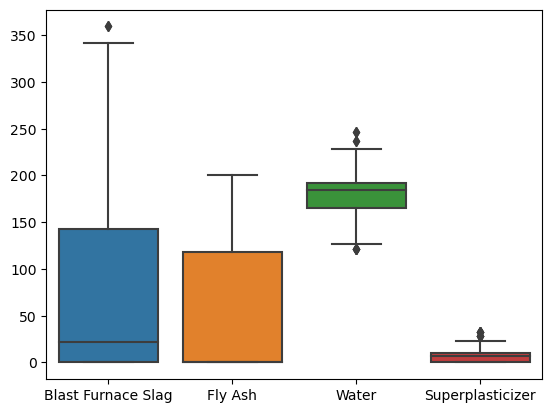

In [8]:
sns.boxplot(data=df.iloc[:,1:5])

<AxesSubplot:>

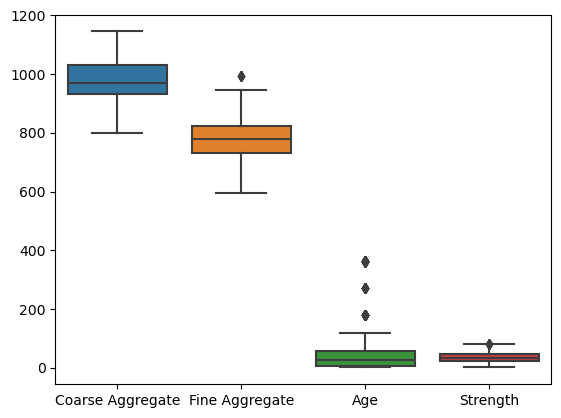

In [9]:
sns.boxplot(data=df.iloc[:,5:9])

### 3.1

In [10]:
q1=df["Blast Furnace Slag"].quantile(0.25)
q3=df["Blast Furnace Slag"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
df["Blast Furnace Slag"]=np.where(df["Blast Furnace Slag"]>upper_limit,upper_limit,
                                  df["Blast Furnace Slag"])

<AxesSubplot:>

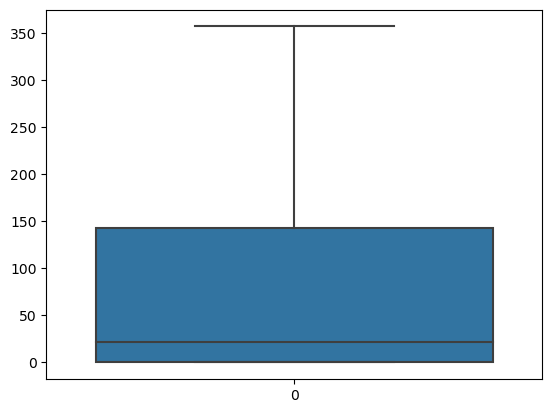

In [11]:
sns.boxplot(data=df["Blast Furnace Slag"])

### 3.2

In [12]:
q1=df["Water"].quantile(0.25)
q3=df["Water"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
df["Water"]=np.where(df["Water"]>upper_limit,upper_limit,
                                  df["Water"])
df["Water"]=np.where(df["Water"]<lower_limit,lower_limit,
                                  df["Water"])

<AxesSubplot:>

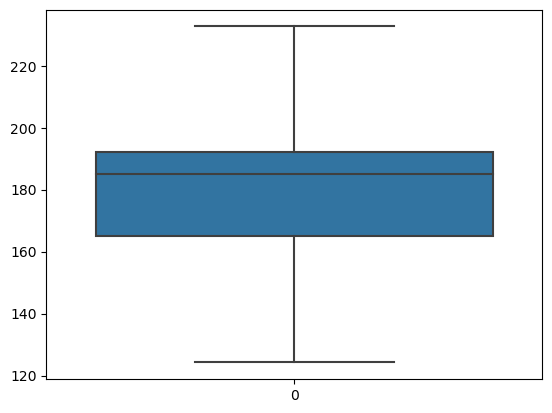

In [13]:
sns.boxplot(data=df["Water"])

### 3.3

In [14]:
q1=df["Superplasticizer"].quantile(0.25)
q3=df["Superplasticizer"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
df["Superplasticizer"]=np.where(df["Superplasticizer"]>upper_limit,upper_limit,
                                  df["Superplasticizer"])

<AxesSubplot:>

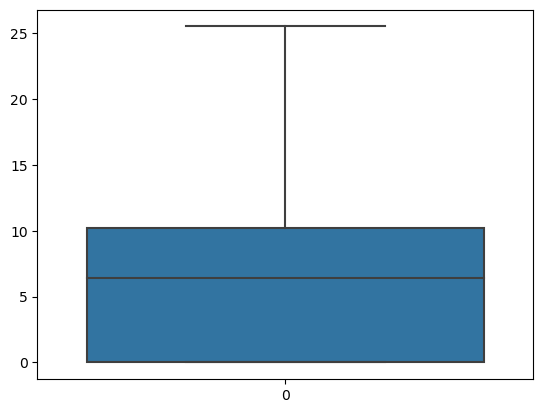

In [15]:
sns.boxplot(data=df["Superplasticizer"])

### 3.4

In [16]:
q1=df["Fine Aggregate"].quantile(0.25)
q3=df["Fine Aggregate"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
df["Fine Aggregate"]=np.where(df["Fine Aggregate"]>upper_limit,upper_limit,
                                  df["Fine Aggregate"])

<AxesSubplot:>

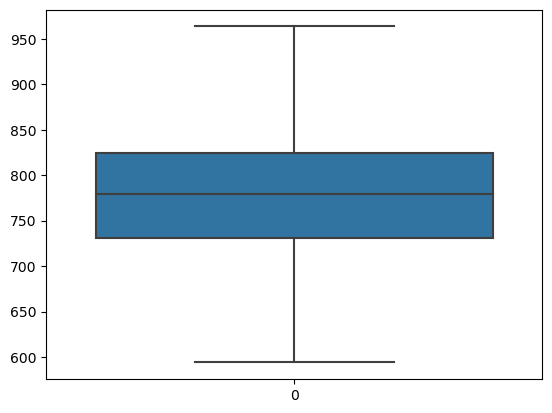

In [17]:
sns.boxplot(data=df["Fine Aggregate"])

### 3.5

In [18]:
q1=df["Age"].quantile(0.25)
q3=df["Age"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
df["Age"]=np.where(df["Age"]>upper_limit,upper_limit,
                                  df["Age"])

<AxesSubplot:>

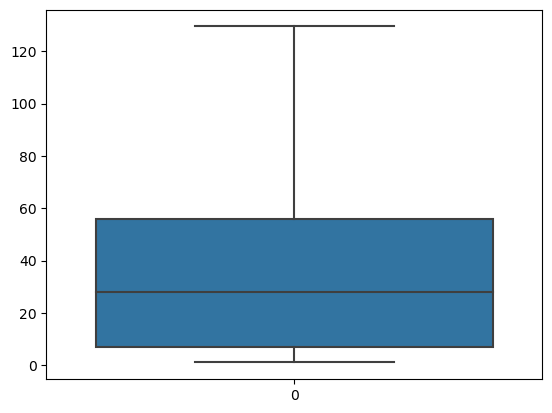

In [19]:
sns.boxplot(data=df["Age"])

### 3.6

In [20]:
q1=df["Strength"].quantile(0.25)
q3=df["Strength"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
df["Strength"]=np.where(df["Strength"]>upper_limit,upper_limit,
                                  df["Strength"])

<AxesSubplot:>

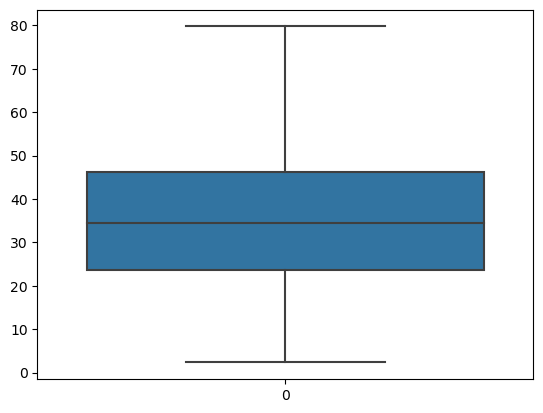

In [21]:
sns.boxplot(data=df["Strength"])

<AxesSubplot:>

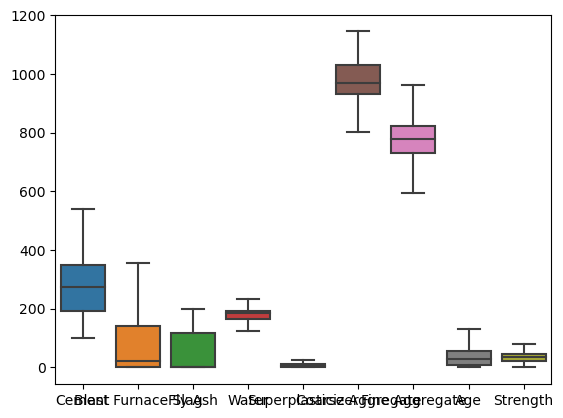

In [22]:
sns.boxplot(data=df)

## Checking Assumption

## Linearity

In [23]:
df.corr().tail(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Strength,0.498008,0.134621,-0.105577,-0.290969,0.366235,-0.16525,-0.169601,0.469807,1.0


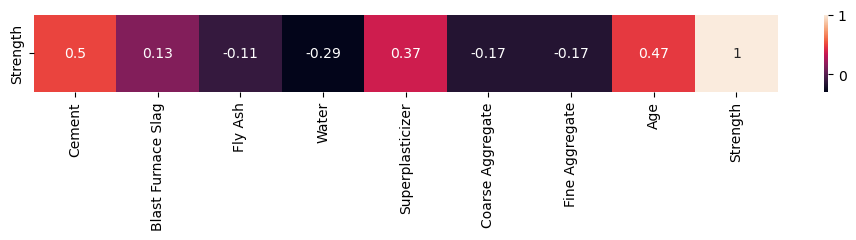

In [24]:
plt.figure(figsize=(12,1))
sns.heatmap(df.corr().tail(1),annot=True)
plt.show()

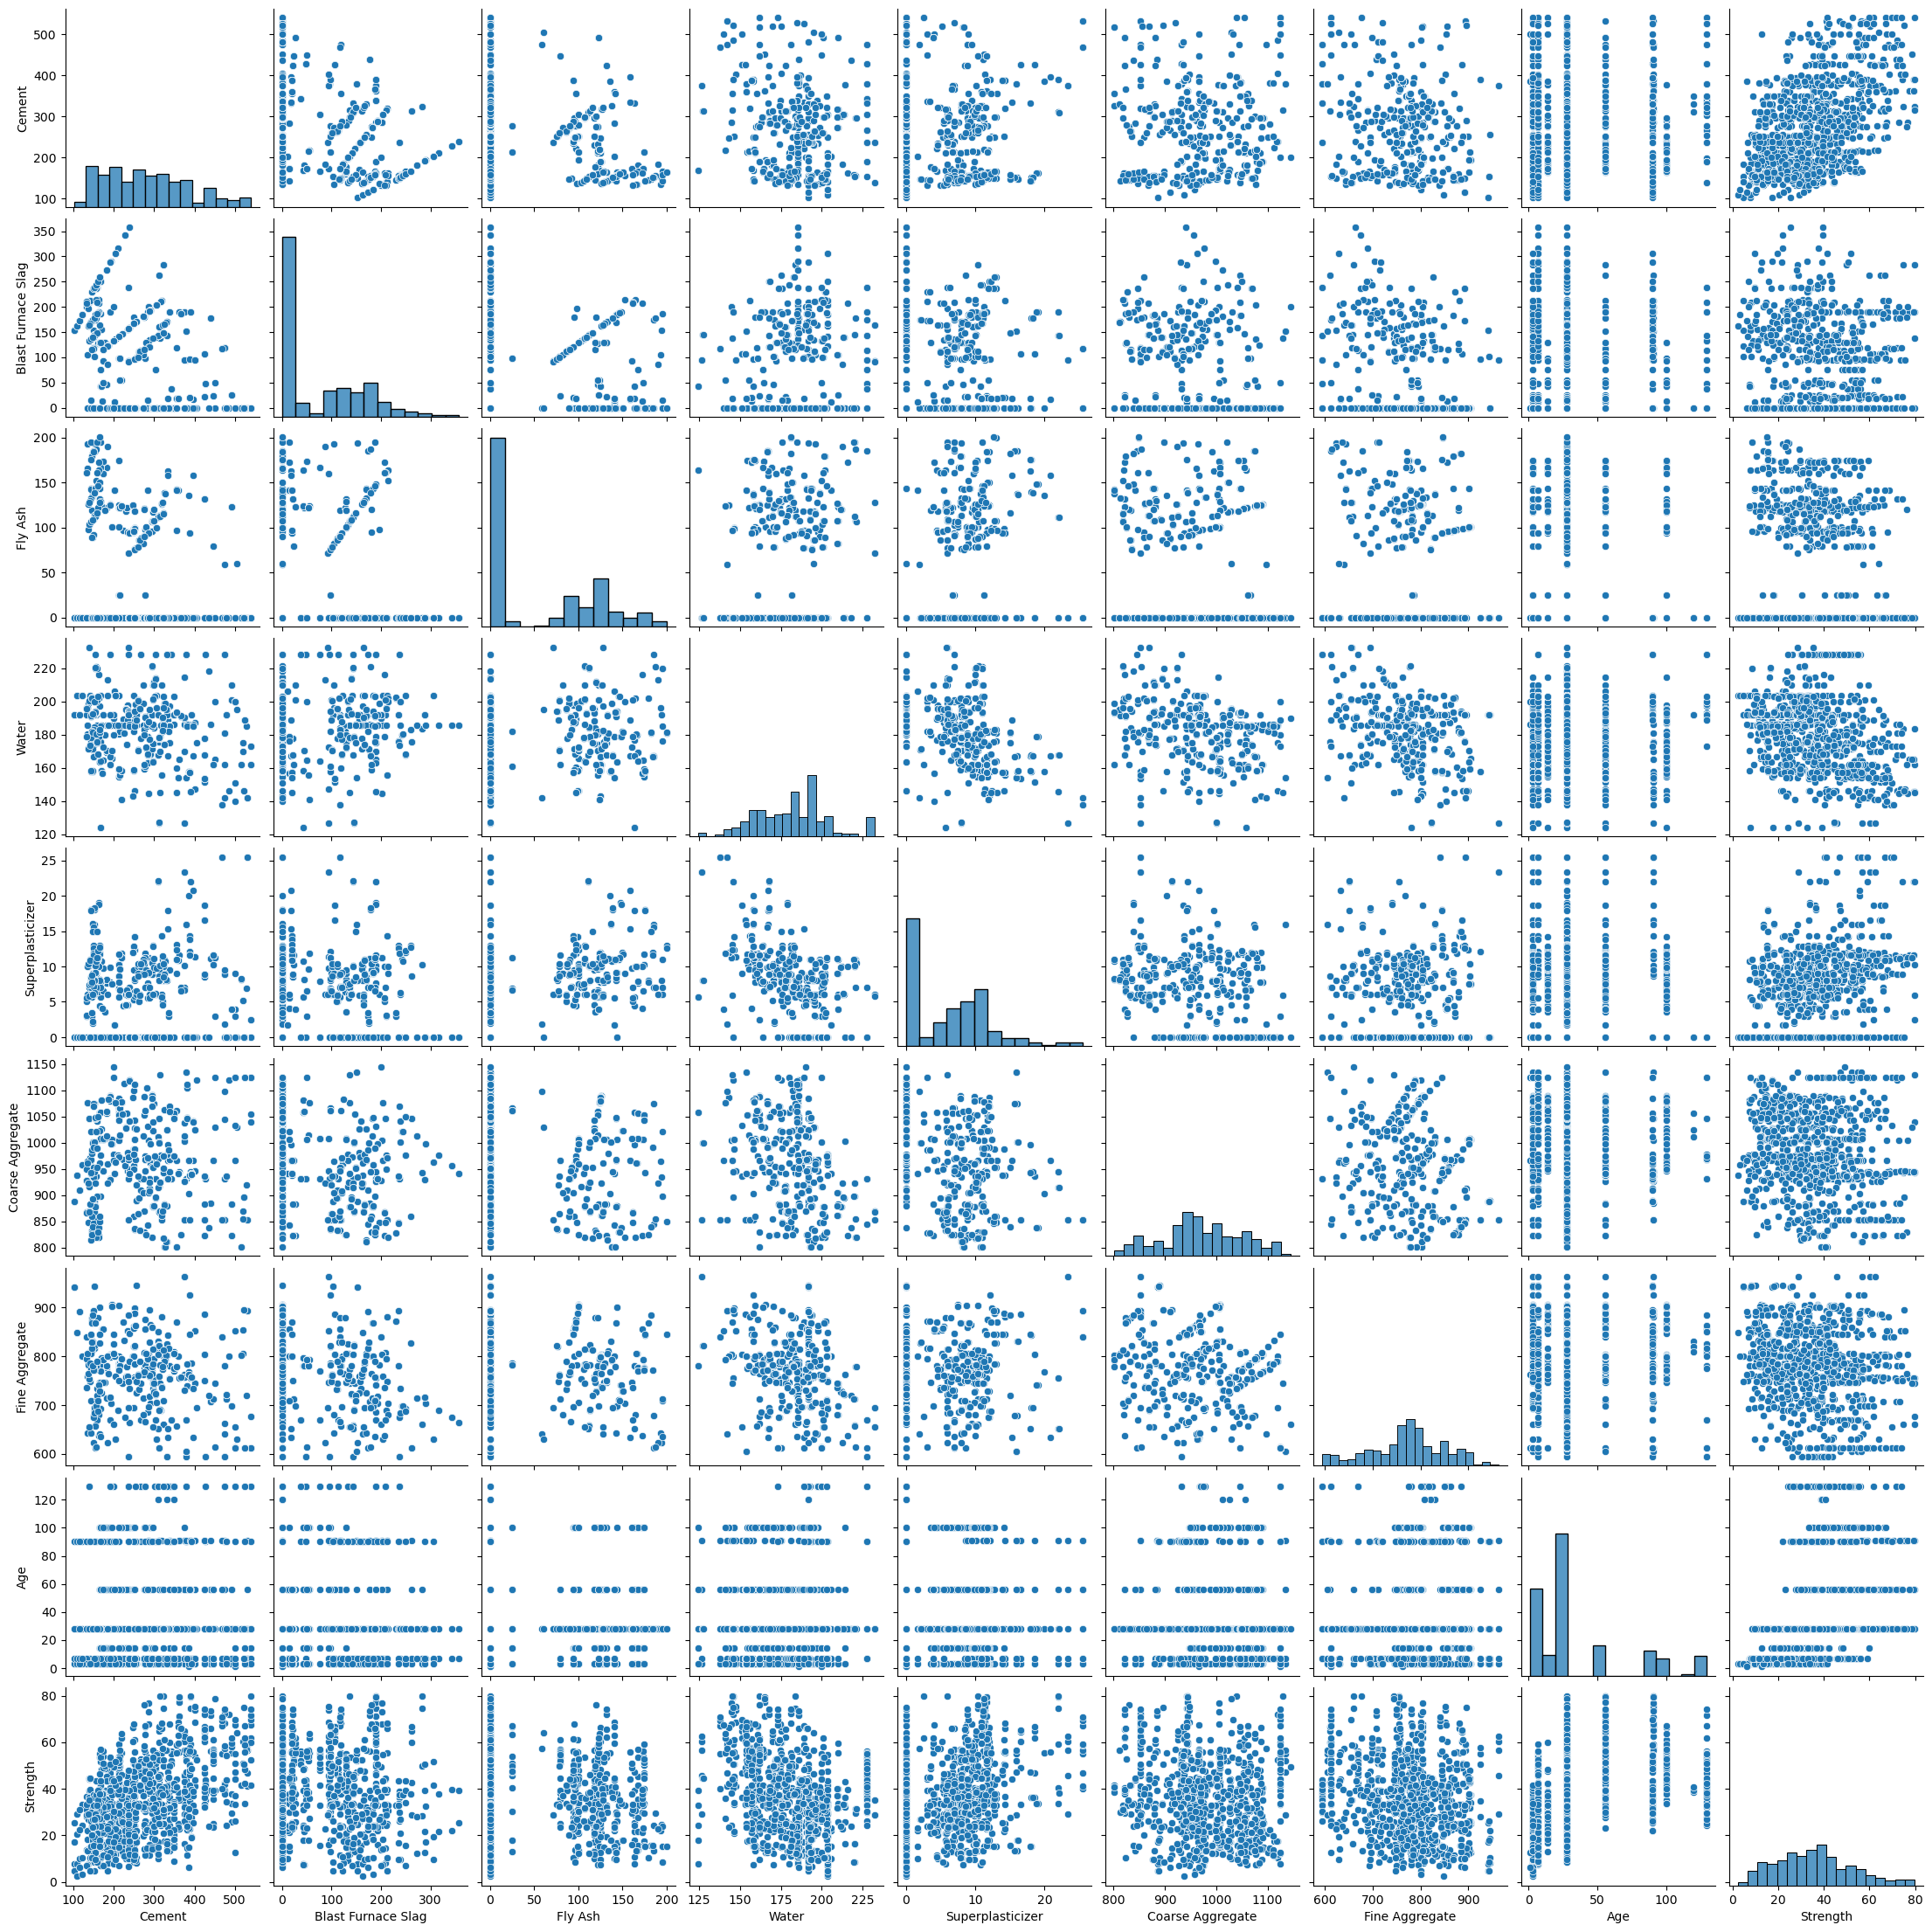

In [25]:
sns.pairplot(df)

## No multicolinearity

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_list=[vif(df,i) for i in range(0,5)]
vif_list

[30.746743360877048,
 4.936640410978064,
 4.7967525366795805,
 96.93671944864715,
 5.848751267120516]

<AxesSubplot:>

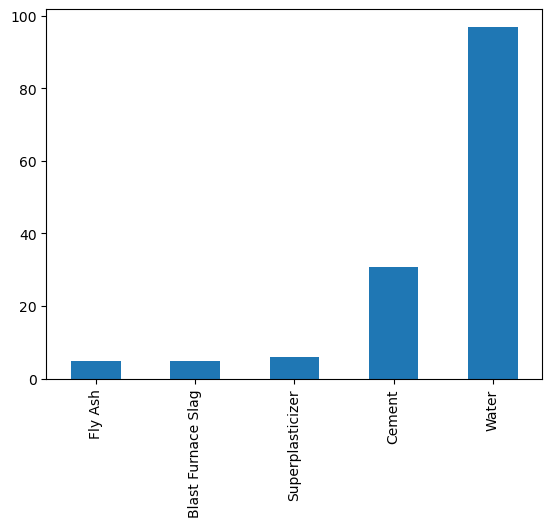

In [27]:
s=pd.Series(vif_list,index=df.columns[0:5])
s.sort_values().plot(kind="bar")

# Step 4. Feature Engineering

# Step 5. Feature Selection

# Step 6. Model Training

In [28]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [29]:
X=df.drop("Strength",axis=1)
y=df["Strength"]

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [31]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((721, 8), (721,), (309, 8), (309,))

In [32]:
model=LinearRegression()
model

LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
model.coef_

array([ 0.11914041,  0.10324357,  0.08347169, -0.16482934,  0.23495837,
        0.01471908,  0.01432967,  0.25424824])

In [35]:
model.intercept_

-16.398876654766887

# Step7. Model Evaluation

In [36]:
model.score(X_train,y_train)

0.7239023386581807

In [37]:
y_pred=model.predict(X_test)
y_pred[0:5]

array([48.93265929,  9.98319081, 52.07052355, 45.30605901, 31.04872319])

In [38]:
y_test[0:5]

559    39.44
705     3.32
500    57.92
218    40.39
836    33.42
Name: Strength, dtype: float64

In [39]:
## Testing data evaluation

y_pred=model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")

mae = mean_absolute_error(y_test,y_pred)
print(f"MAE = {mae}")

r2 = r2_score(y_test,y_pred)
print(f"R-Squared Value = {r2}")


MSE = 70.32187602600443
RMSE = 8.385813975160934
MAE = 6.546884801571085
R-Squared Value = 0.7403285767939862


## Training data model Evalaution 

y_pred = model.predict(X_train)

mse = mean_squared_error(y_train,y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")

mae = mean_absolute_error(y_train,y_pred)
print(f"MAE = {mae}")

r2 = r2_score(y_train,y_pred)
print(f"R-Squared Value = {r2}")

## 4th Assumption Normality of residual

In [40]:
y_pred=model.predict(X_test)
residual=y_test-y_pred

<AxesSubplot:xlabel='Strength', ylabel='Density'>

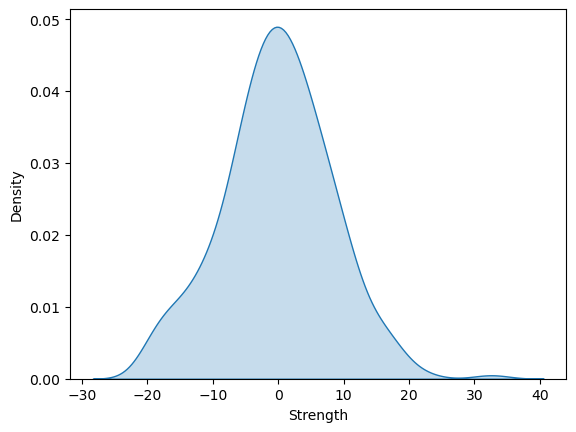

In [41]:
sns.kdeplot(residual,fill=True)

<AxesSubplot:xlabel='Strength', ylabel='Count'>

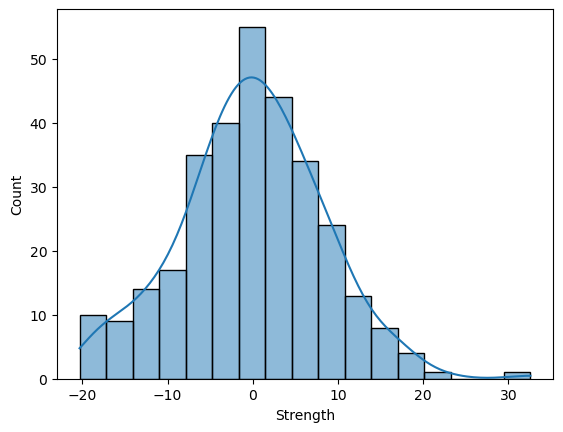

In [42]:
sns.histplot(residual,kde=True)

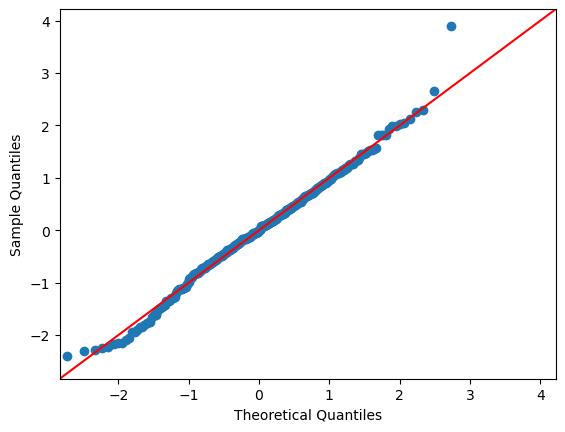

In [43]:
import statsmodels.api as sm 
sm.qqplot(residual,fit=True,line="45")
plt.show()

In [44]:
from scipy.stats import shapiro
stats, p_value = shapiro(residual)
p_value

0.14785708487033844

In [45]:
if p_value >= 0.05:
    print(f"Residuals are normally distributed")
    print(f"Null Hypothesis is True") 
else: 
    print(f"Residuals are not normally distributed")
    print(f"Null Hypothesis is False")

Residuals are normally distributed
Null Hypothesis is True


## Assumption 5 -- Homoscedasticity

In [46]:
y_train_pred=model.predict(X_train)
len(y_train_pred)

721

In [47]:
residual=(y_train)-(y_train_pred)
residual.head()

426    -0.709859
835   -11.224382
242     1.030672
823   -17.639241
157    16.466995
Name: Strength, dtype: float64

<AxesSubplot:xlabel='Strength', ylabel='Strength'>

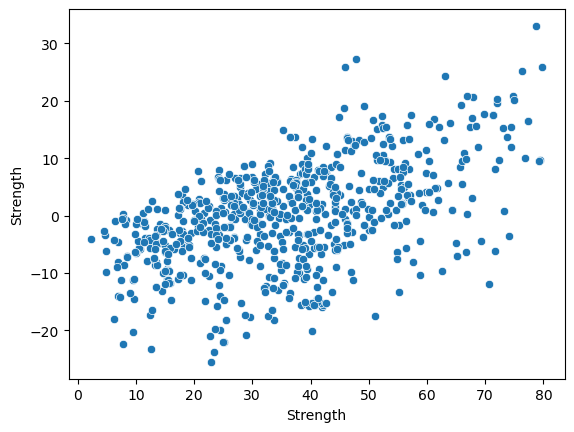

In [48]:
sns.scatterplot(x=y_train,y=residual)

In [49]:
df.tail(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28.0,32.4


In [50]:
model.predict([[260.9,100.5,78.3,200.6,8.6,864.5,761.5,28]])

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31.30817887])

In [51]:
model.predict([[540,100,70,400,15,900,900,28]])

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34.9597796])

In [52]:
df.head(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.7725
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.8900


In [53]:
model.predict([[540,0,0,162,2.5,1055,676,28]])

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54.15641744])

# Hyperparameter Tuning

### GridSearchCV

In [54]:
lasso_hyp_model=Lasso()
lasso_hyp_model

Lasso()

In [55]:
hyperparam={"alpha":np.arange(1,20,0.5)}     #0.01,2,0.01
gscv=GridSearchCV(lasso_hyp_model,hyperparam)
gscv.fit(X_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5])})

In [56]:
gscv.best_estimator_

Lasso(alpha=6.0)

In [57]:
gscv.best_params_

{'alpha': 6.0}

# L1 Regularization

In [58]:
Lasso_model=Lasso(alpha=6)
Lasso_model.fit(X_train,y_train)

Lasso(alpha=6)

In [59]:
model_train_eval=(Lasso_model,X_train,y_train)


In [60]:
Lasso_model = Lasso(alpha=6)
Lasso_model.fit(X_train,y_train)

def model_eval(model,x,y):
    y_pred = model.predict(x)
    mse = mean_squared_error(y,y_pred)
    print(f"MEAN SQUARED VALUE = {mse}")
    print(f"ROOT MEAN SQUARED VALUE = {np.sqrt(mse)}")
    
    mae = mean_absolute_error(y,y_pred)
    print(f"MEAN ABSOLUTE ERROR = {mae}")
    
    r2 = r2_score(y,y_pred)
    print(f"R-SQUARED VALUE = {r2}")
    
    n = x.shape[0]
    p = x.shape[1]
    adj_r2 = 1 - (((1-r2)* (n-1)) / (n-p-1))
    print(f"ADJUSTED R - SQUARED VALUE = {adj_r2}")
    
    return "Success"
    
    

In [61]:
 ## Training data Eval 
model_eval(Lasso_model,X_train, y_train)

MEAN SQUARED VALUE = 78.57351972202363
ROOT MEAN SQUARED VALUE = 8.864170560296301
MEAN ABSOLUTE ERROR = 6.914698017538564
R-SQUARED VALUE = 0.7209252056753199
ADJUSTED R - SQUARED VALUE = 0.7177895338289753


'Success'

In [62]:
model_eval(Lasso_model,X_test, y_test)

MEAN SQUARED VALUE = 71.04526418857861
ROOT MEAN SQUARED VALUE = 8.428835280664739
MEAN ABSOLUTE ERROR = 6.597791039626246
R-SQUARED VALUE = 0.7376573847791918
ADJUSTED R - SQUARED VALUE = 0.730661581706637


'Success'

In [66]:
with open("concrete.pkl","wb") as file:
    pickle.dump(model,file)